## SimEx - Main Function


Simulator...
Validator...
       *** USING local_exploration_validator_A


CALLED FIT_CURVE
Y_PRED[ -0.44377073   3.80266622  16.21532806  36.79421481  65.53932646
 102.45066301 147.52822445 200.7720108  262.18202205 331.7582582 ]
X_VALUES[  1.           7.37856441  26.02359882  56.93510324 100.11307768
 155.55752212 223.26843658 303.24582104 395.48967552 500.        ]
EQUATIONy =  0.665735528909474x^1 -1.1095062596103717
LEAST FIT POINTS:  []
unfit_interval []
least_fit_points []
LF... rest_of_points:       [(1.0, -0.31676604275941656), (7.378564405113078, 2.8026170041488276), (26.023598820058996, 15.465890853930196), (56.935103244837755, 36.96405469747737), (100.11307767944936, 67.92527329979688), (155.55752212389382, 104.10041259721179), (223.2684365781711, 144.87999828576204), (303.2458210422812, 199.9257523766874), (395.48967551622417, 263.0071622985203), (500.0, 331.8445479604573)]
       *** USING plot_curve


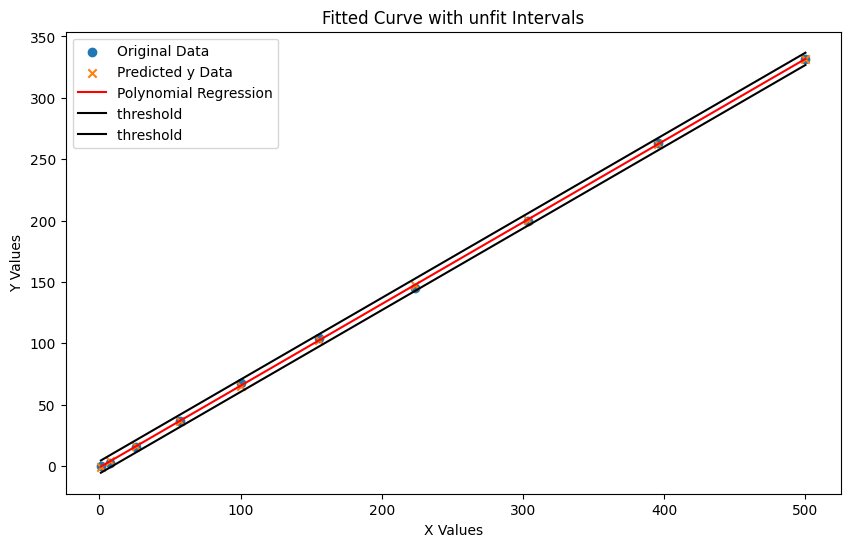

       *** OUTPUT unfit_interval [] 

equation,fit_points,fit_interval
 y =  0.665735528909474x^1 -1.1095062596103717 
 [[1.0, -0.31676604275941656], [7.378564405113078, 2.8026170041488276], [26.023598820058996, 15.465890853930196], [56.935103244837755, 36.96405469747737], [100.11307767944936, 67.92527329979688], [155.55752212389382, 104.10041259721179], [223.2684365781711, 144.87999828576204], [303.2458210422812, 199.9257523766874], [395.48967551622417, 263.0071622985203], [500.0, 331.8445479604573]] 

 [[1, 500]]
       *** OUTPUT validator_intervals [] 



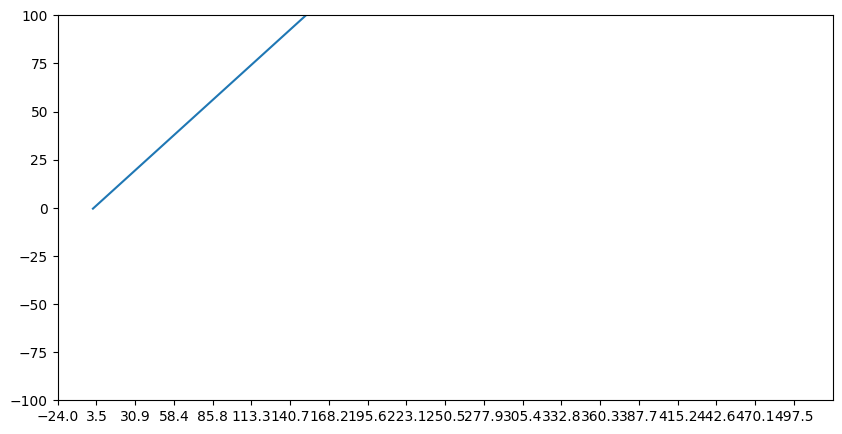

In [1]:
# IMPORT LIBRARIES
import numpy as np

from global_settings import simexSettings,mfs,mds,sfs
from Validator import Validator
#from Modifiers import Modifiers
from ModifierController import ModifierController
#from Simulators import Simulators
from SimulatorController import SimulatorController
from Logger import Logger

validator = Validator()
#modifier = Modifiers
#simulator = Simulators
logger = Logger()
logger_main_arguments = {}
is_main_func = True
# Initialize interval list for the first iteration
intervals_list=[(mds['domain_min_interval'], mds['domain_max_interval'])]


while is_main_func:
    
    # Calls Modifier Controller
    mod_outcome = ModifierController.modifierController(intervals_list=intervals_list,local_modifier=mfs['selectedModifier'], do_plot=simexSettings['do_plot'])
    mod_x_list = mod_outcome[0]
    checked_intervals = mod_outcome[1]
    
    # breaks loop if iterations end by granularity reached
    if not mod_x_list: # FALSE IF ['modifier_data_point'] < mdv['modifier_incremental_unit']:
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no generated points'
        logger_main_arguments['remaining_unfit_intervals'] = checked_intervals
        logger.log_main(logger_main_arguments)
        break
    
    # Calls Simulator
    mod_x,sim_y_list = SimulatorController.simulatorController(mod_x=mod_x_list,selected_function=sfs['selectedSimulator'])
    assert len(mod_x) == len(sim_y_list)
      
    # Calls Validator controller
    intervals_list = validator.validator_controller(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list))
    # Updates interval_list to new range output from validator controller

    # No more unfit intervals -> write MAIN log
    if not intervals_list:
        is_main_func = False
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no unfit intervals'
        logger.log_main(logger_main_arguments)

# MAIN cycle completed/interrupted -> write OVERALL statistics        
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)

